In [1]:
import numpy as np 
from jax import random
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
np.random.random()
key = random.PRNGKey(42)

In [3]:
key, subkey = random.split(key)
random.uniform(subkey)

Array(0.91457367, dtype=float32)

In [4]:
key, subkey = random.split(key)
x = random.uniform(key,(1,1000),dtype=np.float64)*(2*np.pi)
x = jnp.sort(x)

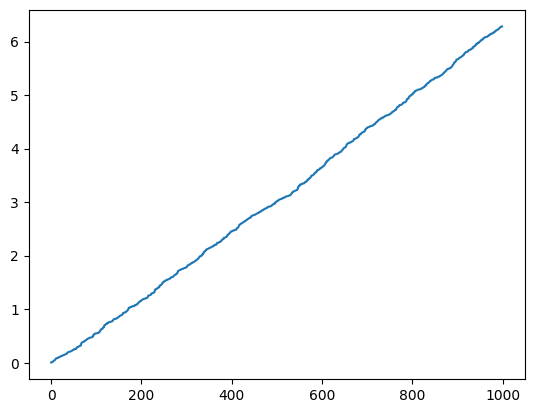

In [5]:
plt.plot(x[0])

In [6]:
y = jnp.sin(x)



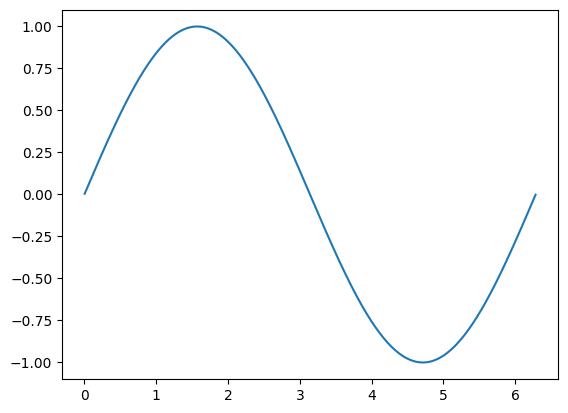

In [7]:
plt.plot(x[0],y[0])

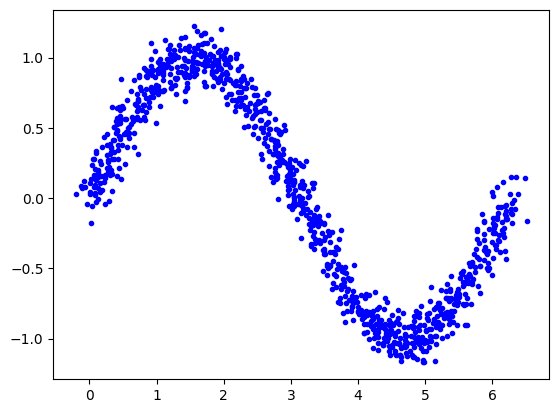

In [8]:
key, subkey = random.split(key)
uni_x= random.normal(key,(1,1000),dtype=np.float64)*0.1
key, subkey = random.split(key)
uni_y= random.normal(key,(1,1000),dtype=np.float64)*0.1
plt.plot(x[0]+uni_x[0], y[0]+uni_y[0], 'b.')

In [9]:
x = random.uniform(key,(1,1000),dtype=np.float64)*(2*np.pi)
y = jnp.sin(x)


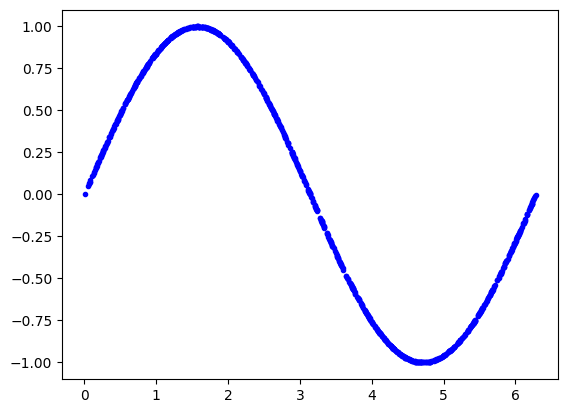

In [10]:
plt.plot(x[0], y[0], 'b.')

In [11]:
x

Array([[4.9024515e+00, 3.7227318e+00, 3.5879819e+00, 1.6178404e-01,
        3.8164117e+00, 4.4641919e+00, 4.8177800e+00, 2.9994748e+00,
        9.6099180e-01, 6.0573182e+00, 4.7518058e+00, 6.1367335e+00,
        4.7280149e+00, 1.6024078e+00, 4.6156907e+00, 2.0507660e+00,
        4.3126974e+00, 7.3503673e-01, 4.0821266e-01, 3.4485874e+00,
        2.0903831e+00, 4.6952481e+00, 6.1272612e+00, 6.2486415e+00,
        4.1822025e-01, 1.7879355e+00, 1.0849528e+00, 1.6948361e+00,
        4.0208799e-01, 4.0862050e+00, 1.7695465e+00, 4.3520241e+00,
        2.5856340e+00, 1.9598492e+00, 3.1410625e+00, 6.1103144e+00,
        3.7138867e+00, 5.7895956e+00, 4.7595644e+00, 2.3047321e+00,
        1.7600490e+00, 2.1391325e+00, 5.5640564e+00, 5.8282247e+00,
        1.2466478e+00, 4.5113101e+00, 1.5508876e+00, 2.5014141e+00,
        5.2326107e+00, 3.2803245e+00, 2.3075326e-01, 3.7248125e+00,
        1.3379631e+00, 2.4302735e+00, 5.6798592e+00, 4.6886784e-01,
        2.6217463e+00, 4.0828758e-03, 3.7334456e

In [12]:
key, subkey = random.split(key)

In [15]:

x = random.uniform(key,(1,1000),dtype=np.float64)[0]*(2*np.pi)


train_x = random.choice(key,x,(1,600),replace=False)[0]
train_y = jnp.sin(train_x)

test_val = jnp.setdiff1d(x,train_x)


test_val = random.permutation(key,test_val)
test_x = random.choice(key,test_val,(1,200),replace=False)[0]
test_y = jnp.sin(test_x)

val_x = jnp.setdiff1d(test_val,test_x)
val_x = random.permutation(key,val_x)
val_y = jnp.sin(val_x)


In [16]:
x = [train_x,test_x,val_x]
y = [train_y,test_y,val_y]
train_x, test_x, val_x = list(map(lambda x: x+(random.normal(key,(1,len(x)),dtype=np.float64)*0.1)[0],x))
key, subkey = random.split(key)
train_y, test_y, val_y = list(map(lambda x: x+(random.normal(key,(1,len(x)),dtype=np.float64)*0.1)[0],y))

In [17]:
a = f'''{"mean":<10}|{"max":^10}|{"min":<10}
{train_x.mean():<10.3f}|{train_x.max():^10.3f}|{train_x.min():<10.3f}
{test_x.mean():<10.3f}|{test_x.max():^10.3f}|{test_x.min():<10.3f}
{val_x.mean():<10.3f}|{val_x.max():^10.3f}|{val_x.min():<10.3f}'''
print(a)

mean      |   max    |min       
3.218     |  6.367   |-0.091    
2.845     |  6.309   |-0.075    
3.197     |  6.324   |-0.037    


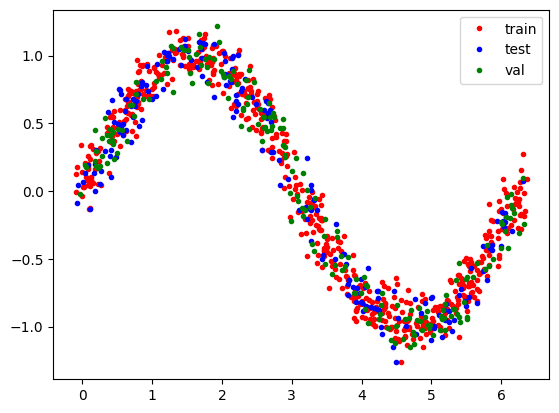

In [18]:
plt.plot(train_x,train_y,'r.',label='train')
plt.plot(test_x,test_y,'b.',label='test')
plt.plot(val_x,val_y,'g.',label='val')
plt.legend()

Requirments in jax below

1. A function to initialize weights
2. Foward passing funciton 
3. A function to compute loss for 
4. An update function/GD

## Initialize weights

In [507]:

key = random.PRNGKey(42)
key, subkey = random.split(key)

In [508]:
key_gen = iter(random.split(key,5))
next(key_gen)

Array([980334527, 471979325], dtype=uint32)

In [523]:
layer_sizes = [1, 8,16, 1]
def initialize(arch_dims,jax_key=None, seed=42):
    n_layers = len(arch_dims)
    in_,out = arch_dims[:-1],arch_dims[1:]
    if not jax_key:
        key = random.PRNGKey(seed)
    key_gen = map(random.split,iter(random.split(key,len(arch_dims))))
    return [(random.uniform(k_w, (w, h)), random.uniform(k_b, (w,))) for (k_b,k_w),h,w in zip(key_gen, in_,out)]

params = initialize(layer_sizes)


In [524]:

def get_forward(params,x_data):
    activation = jnp.array([x_data])
    print(activation)
    for w,b in params[:-1]:
        out = jnp.dot(w, activation) + b
        activation = relu(out)
    fw,fb = params[-1]
    return jnp.dot(fw,activation)+fb

    

In [525]:

from jax import vmap as vmap
batch_forward = vmap(get_forward, in_axes=(None,0))

In [526]:
feature_batch = batch_forward(params,train_x[:100])

Traced<ShapedArray(float32[1])>with<BatchTrace(level=1/0)> with
  val = Array([[ 2.5594199e+00],
       [ 5.5265718e+00],
       [ 3.4301679e+00],
       [ 1.1567007e-01],
       [ 2.3778887e+00],
       [ 5.5196133e+00],
       [ 4.1361146e+00],
       [ 1.2456239e+00],
       [ 5.5670304e+00],
       [ 1.6889515e+00],
       [ 5.8250546e+00],
       [ 3.9129932e+00],
       [ 6.0807118e+00],
       [ 8.0244333e-02],
       [ 4.4831867e+00],
       [ 1.0547624e+00],
       [ 7.9021150e-01],
       [ 9.1198301e-01],
       [ 7.0055401e-01],
       [ 3.8882646e-01],
       [ 2.5637293e+00],
       [ 1.3243084e+00],
       [ 1.4615510e+00],
       [ 1.7010278e+00],
       [ 4.3108940e+00],
       [ 6.2570441e-01],
       [ 2.7113624e+00],
       [ 3.8001878e+00],
       [ 2.3515246e+00],
       [ 2.4916525e+00],
       [ 2.7108819e+00],
       [ 7.4494207e-01],
       [ 4.5221643e+00],
       [ 4.9153299e+00],
       [ 4.8115792e+00],
       [ 1.8697948e+00],
       [ 2.0392001e+00],
   

vectorize network

In [527]:
from jax import vmap as vmap
from jax import jit, grad

A function to compute loss

In [528]:
@jit
def mse_loss(params, feature_batch, targets):
    preds = batch_forward(params, feature_batch)
    diff = preds - targets
    return jnp.sum(diff*diff)/preds.shape[0]

In [529]:
@jit
def update(params, x, y, learning_rate):
    grads = grad(mse_loss)(params, x, y)
    return [(w - learning_rate * dw, b - learning_rate * db) 
            for (w, b), (dw, db) in zip(params, grads)]

In [537]:
for epoch in range(30):
    for idx in range(0,len(train_x),20):
        params = update(params,train_x[idx:idx+20],train_y[idx:idx+20],0.01)

In [538]:
batch_forward(params, train_x[:100])

Traced<ShapedArray(float32[1])>with<BatchTrace(level=1/0)> with
  val = Array([[ 2.5594199e+00],
       [ 5.5265718e+00],
       [ 3.4301679e+00],
       [ 1.1567007e-01],
       [ 2.3778887e+00],
       [ 5.5196133e+00],
       [ 4.1361146e+00],
       [ 1.2456239e+00],
       [ 5.5670304e+00],
       [ 1.6889515e+00],
       [ 5.8250546e+00],
       [ 3.9129932e+00],
       [ 6.0807118e+00],
       [ 8.0244333e-02],
       [ 4.4831867e+00],
       [ 1.0547624e+00],
       [ 7.9021150e-01],
       [ 9.1198301e-01],
       [ 7.0055401e-01],
       [ 3.8882646e-01],
       [ 2.5637293e+00],
       [ 1.3243084e+00],
       [ 1.4615510e+00],
       [ 1.7010278e+00],
       [ 4.3108940e+00],
       [ 6.2570441e-01],
       [ 2.7113624e+00],
       [ 3.8001878e+00],
       [ 2.3515246e+00],
       [ 2.4916525e+00],
       [ 2.7108819e+00],
       [ 7.4494207e-01],
       [ 4.5221643e+00],
       [ 4.9153299e+00],
       [ 4.8115792e+00],
       [ 1.8697948e+00],
       [ 2.0392001e+00],
   

Array([[0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.06023327],
       [0.060

In [532]:
train_y[:100]

Array([ 0.5741749 , -0.53683394, -0.03128488,  0.33512384,  0.53711736,
       -0.79699755, -0.97120076,  0.9820888 , -0.52244693,  0.94150734,
       -0.29752493, -0.73452556, -0.3085953 ,  0.17781194, -0.93789446,
        0.88172567,  0.7157242 ,  0.74431217,  0.56312937,  0.13183627,
        0.4320771 ,  1.0178427 ,  1.0702393 ,  1.1129153 , -0.7927444 ,
        0.5850505 ,  0.24435282, -0.653372  ,  0.5300884 ,  0.45322812,
        0.62381446,  0.64489317, -1.0949218 , -0.96681696, -0.8542499 ,
        0.87831295,  0.99965566,  1.0464153 , -0.46777752,  0.601027  ,
        1.0270398 , -0.05175532,  0.02746476,  0.626149  ,  0.37252742,
        0.79566205, -0.58149236, -0.70382196,  0.8028984 , -0.211651  ,
       -0.37523115,  1.0395637 , -0.19116336,  0.7368146 ,  0.47326007,
       -0.9809786 , -0.60424036, -0.03503483,  0.93084854,  1.1276549 ,
       -0.5764523 , -0.7030259 ,  0.12736048, -0.12947267,  0.65237916,
        0.9067668 , -0.4716699 ,  0.86700284, -0.848474  ,  0.47